### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np
m=np.arange(12).reshape((3,4))
print("Matrice iniziale:")
print(m,"\n")
valore_m=np.array(np.mean(m))
media_r=np.array([np.mean(m[i,:]) for i in range(m.shape[0])])
media_c=np.array([np.mean(m[:,i]) for i in range(m.shape[1])])
print("Media complessiva = ",valore_m)
print("Media righe: ",media_r)
print("Media colonne: ",media_c)


Matrice iniziale:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

Media complessiva =  5.5
Media righe:  [1.5 5.5 9.5]
Media colonne:  [4. 5. 6. 7.]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [7]:
import numpy as np
u=np.array([1,3,5,7])
v=np.array([2,4,6,8])
print("Vettore u: ",u)
print("Vettore v: ",v)
#Primo modo:
prodotto_est=np.outer(u,v)
print("Sfruttando np.outer:")
print(prodotto_est , '\n')

#Secondo modo:
risultato_2=np.array([ [u[i]*v[j] for j in range(4)] for i in range(4)])
print("List comprehension:")
print(risultato_2, '\n')

#Terzo modo:
u_new=np.tile(u,(4,1)).T       #VETTORE TRASPOSTO
v_new=np.tile(v,(4,1))
risultato_3=u_new*v_new #Il risultato è una matrice
print("Broadcasting:")
print(risultato_3, )

Vettore u:  [1 3 5 7]
Vettore v:  [2 4 6 8]
Sfruttando np.outer:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

List comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Broadcasting 
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [17]:
import numpy.random as npr

matrice=npr.rand(10,6)
print("\x1b[1;34mLa matrice iniziale è data da:\x1b[0m")
print(matrice,"\n")

for i in range(0,10):
    if (np.any(matrice[i,:]<0.1)==True):
        matrice[i,:]=0
print("\x1b[1;34mLa matrice iniziale modificata sarà:\x1b[0m")
print(matrice)

La matrice iniziale è data da:
[[0.58686411 0.96451984 0.25410431 0.29008331 0.14405422 0.50537794]
 [0.07866823 0.18683496 0.72181942 0.10804126 0.98504025 0.06734928]
 [0.20362167 0.81146073 0.73638215 0.27833657 0.53836717 0.66779759]
 [0.67059517 0.51846403 0.7896383  0.64163584 0.08342723 0.18092384]
 [0.17035461 0.39084189 0.64064446 0.88523725 0.25378631 0.82438889]
 [0.27448735 0.7830617  0.82719553 0.09138247 0.87574889 0.48811846]
 [0.37568188 0.4192114  0.16919341 0.59305887 0.40508273 0.51951023]
 [0.84700701 0.07951444 0.82575768 0.95439166 0.29960884 0.80880484]
 [0.56326087 0.24616829 0.07671497 0.82279503 0.1253519  0.0777638 ]
 [0.69812577 0.5967136  0.86081735 0.46612815 0.49343458 0.9403816 ]] 

La matrice iniziale modificata sarà:
[[0.58686411 0.96451984 0.25410431 0.29008331 0.14405422 0.50537794]
 [0.         0.         0.         0.         0.         0.        ]
 [0.20362167 0.81146073 0.73638215 0.27833657 0.53836717 0.66779759]
 [0.         0.         0.      

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

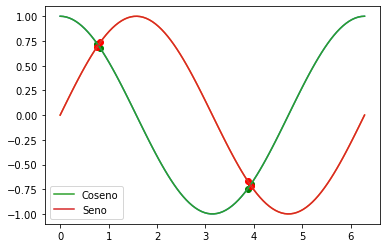

In [29]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

a=np.linspace(0,2*m.pi,100)
print(a,"\n")

print("Stampa ogni decimo elemento:")
print(a[0:100:10],"\n")
print("Usando la slice notation, l'array invertito sarà:")
print(a[::-1],"\n")

b = np.empty((0))
print("Elementi per cui la differenza è minore di 0.1:")
for i in range(0,100): 
    if abs(m.cos(a[i])-m.sin(a[i]))<0.1:
        b = np.append(b,a[i]) 
print(b)

plt.plot(b,np.cos(b), color="green", marker="o", linestyle="")
plt.plot(b,np.sin(b), color="red", marker="o", linestyle="")
plt.plot(a,np.cos(a))
plt.plot(a,np.sin(a))

plt.plot(a,np.cos(a), label="Coseno")
plt.plot(a,np.sin(a), label="Seno")

plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [21]:
a=np.array([ [i*j for j in range(1,11)] for i in range(1,11)])
print(a,"\n")

print("traccia:" ,np.trace(a))

anti_diag=np.array([a[i,9-i] for i in range(0,10)])
print("anti diagonale: ",anti_diag)

diag=np.array([a[1+i,i] for i in range(0,9)])
print("Ultima richiesta: ",diag)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

traccia: 385
anti diagonale:  [10 18 24 28 30 30 28 24 18 10]
Ultima richiesta:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [223]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
griglia_distanze = np.abs(dist - dist[:, np.newaxis])
print("\x1b[1;30mTabella che riporta la distanza tra le città, l'una rispetto all'altra, in KM:\x1b[0m")

print(griglia_distanze*1.6)

Tabella che riporta la distanza tra le città, l'una rispetto all'altra, in KM:
[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  966.4  480.     0.   110.4  700.8 1556.8]
 [2470.4 2153.6 1985.6 1292.8 1076.8  590.4  110.4    0.   590.4 1446.4]
 [3060.8 2744.  2576.  1883.2 1667.2 1180.8  700.8  590.4    0.   856. ]
 [3916.8 3600.  3432.  2739.2 2523.2 2036.8 1556.8 1446.4  856.     0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [222]:
import numpy as np
#Algoritmo per la ricerca dei numeri primi
N=1000#inserire valore a piacere entro cui cercare numeri primi
num=np.arange(2,N)
lista=[2,]

for i in range (2,N-2):
    the_mask=(num%i==0)
    filtro=num[the_mask]
    c=np.setdiff1d(num, filtro) 
    num=c
    try:
        lista.append(num[0])
    except:
        print("",end="")



lista=list(set(lista))#tolgo i doppioni
lista.sort()#ordine crescente
print("Numeri primi da",2,"a",N,":","\n")
%timeit risultato
print(lista)


Numeri primi da 2 a 1000 : 

29.5 ns ± 0.577 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


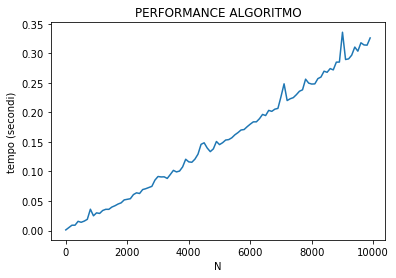

In [165]:
#PERFORMANCE
import numpy as np
import time
import matplotlib.pyplot as plt
x=[]
y=[]
for j in range (1,10000,100):
    t1=time.time()
    num=np.arange(2,j)
    lista=[2,]

    for i in range (2,j-2):
        the_mask=(num%i==0)
        filtro=num[the_mask]
        c=np.setdiff1d(num, filtro) 
        num=c
        try:
            lista.append(num[0])
        except:
            print("",end="")
    risultato=list(set(lista))
    t2=time.time()
    x.append(j)
    y.append(t2-t1)

plt.plot(x,y)
plt.title("PERFORMANCE ALGORITMO")
plt.xlabel("N"),plt.ylabel("tempo (secondi)")
plt.show()


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Inizio; partenza di ogni walker casuale:
[[ 1 -1  1 ...  0  0  0]
 [ 0  0  0 ... -1  0  0]
 [ 0 -1  0 ...  0  1  0]
 ...
 [ 0 -1  0 ...  0  1  1]
 [ 0 -1  0 ...  0  0 -1]
 [-1  0  0 ... -1  1 -1]] 

walking distances: 
[[ 1  0  1 ... -1 -1 -1]
 [ 0  0  0 ...  3  3  3]
 [ 0 -1 -1 ... 13 14 14]
 ...
 [ 0 -1 -1 ... -2 -1  0]
 [ 0 -1 -1 ... -4 -4 -5]
 [-1 -1 -1 ...  2  3  2]] 

The square (elementwise):
[[  1   0   1 ...   1   1   1]
 [  0   0   0 ...   9   9   9]
 [  0   1   1 ... 169 196 196]
 ...
 [  0   1   1 ...   4   1   0]
 [  0   1   1 ...  16  16  25]
 [  1   1   1 ...   4   9   4]]
 the mean of the squared distances at each step:
[0.69856997 1.001998   1.225969   1.42021125 1.60934769 1.76351921
 1.89208879 2.0374003  2.16055548 2.25344181 2.3727621  2.46434575
 2.52784493 2.62106848 2.70222131 2.73751712 2.79892837 2.89810283
 2.97825452 3.10016129 3.22319717 3.30242335 3.35484724 3.4177478
 3.45079701 3.53652372 3.65882495 3.72451339 3.79091018 3.86212377
 3.89858949 3.9408121 

<function matplotlib.pyplot.show(close=None, block=None)>

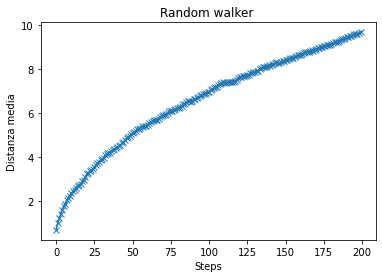

In [214]:
import numpy as np
NW=1000
NS=200
print("Inizio; partenza di ogni walker casuale:")
x=np.random.randint(2, size= (NW, NS))*np.random.choice([-1,1],size= (NW, NS))
print(x,"\n")
print("walking distances: ")

for i in range(0,NW):
    cont=0
    for j in range(0,NS):
        cont=cont+x[i][j]
        x[i][j]=cont
print(x,"\n")
print("The square (elementwise):")
x_q=x**2
print(x_q)

mean_column=np.array([np.mean(x_q[:,i]) for i in range(x_q.shape[1])])
print(" the mean of the squared distances at each step:")
media=pow(mean_column,0.5)
print(media,"\n")

steps=[i for i in range(NS)]
plt.plot(steps,media,marker="x")
plt.title("Random walker ")
plt.xlabel("Steps"),plt.ylabel("Distanza media")
plt.show

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

   ANNI-LEPRI-LINCI-CAROTE:
[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
Numero di lepri in media: 34081.0 std,  20897.9
Numero di linci in media:  20166.7 std,  16254.6
Numero di carote in media:  42400.0  std,  3322.5 :
La matrice di correlazione sarà:
[[ 1.         -0.01660378  0.07189206]
 [-0.01660378  1.         -0.68057717]
 [ 0.07189206 -0.68057717  1.        ]] 
Popolazione più alt

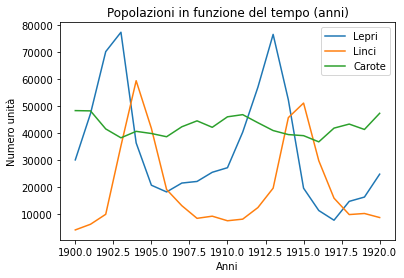

In [64]:
import matplotlib.pyplot as plt

x=np.loadtxt("/Users/Alessandro/LaboratoryOfComputationalPhysics_Y3/populations.txt")
print("   ANNI-LEPRI-LINCI-CAROTE:")
print(x)
anni=x[:,0]
lepri=x[:,1]
linci=x[:,2]
carote=x[:,3]
plt.plot(anni,lepri, label="Lepri")
plt.plot(anni,linci, label="Linci")
plt.plot(anni,carote, label="Carote")
plt.legend()
plt.title("Popolazioni in funzione del tempo (anni)")
plt.xlabel("Anni"),plt.ylabel("Numero unità")

print("\x1b[1;30mNumero di lepri in media:" , round(np.mean(lepri),1) ,"std, ", round(np.std(lepri),1))
print("Numero di linci in media: ", round(np.mean(linci),1) ,"std, ", round(np.std(linci),1))
print("Numero di carote in media: ", round(np.mean(carote),1) ," std, ", round(np.std(carote),1),":\x1b[0m")

print("\x1b[1;30mLa matrice di correlazione sarà:")
print(np.corrcoef([lepri, carote,linci]),"\x1b[0m")
print("Popolazione più alta per anno:")
for i in range(x.shape[0]):
    if (max(lepri[i],linci[i],carote[i])==lepri[i]):
        print("Nell'anno ",anni[i],"era costituita da LEPRI")
    elif (max(lepri[i],linci[i],carote[i])==linci[i]):
        print("Nell'anno ",anni[i],"era costituita da LINCI")
    else:
        print("Nell'anno ",anni[i],"era costituita da CAROTE")